In [2]:
import h5py
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier


# variables to hold the results and names
results = []
names = []
scoring = "accuracy"

# import the feature vector and trained labels
h5f_data = h5py.File('output/data.h5', 'r')
h5f_label = h5py.File('output/labels.h5', 'r')

X = h5f_data['dataset_1']
y = h5f_label['dataset_1']

X = np.array(X)
y = np.array(y)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print ("[STATUS] features shape: {}".format(X.shape))
print ("[STATUS] labels shape: {}".format(y.shape))

print ("[STATUS] training started...")

[STATUS] features shape: (800, 900)
[STATUS] labels shape: (800,)
[STATUS] training started...


In [5]:
# split the training and testing data
(X_train, X_test, y_train, y_test) = train_test_split(X,y,test_size=0.1,random_state=100)
print ("[STATUS] splitted train and test data...")
print ("Train data  : {}".format(X_train.shape))
print ("Test data   : {}".format(X_test.shape))
print ("Train labels: {}".format(y_train.shape))
print ("Test labels : {}".format(y_test.shape))


[STATUS] splitted train and test data...
Train data  : (720, 900)
Test data   : (80, 900)
Train labels: (720,)
Test labels : (80,)


In [6]:
KNN = KNeighborsClassifier(n_neighbors=10)

In [8]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [10]:
predict = KNN.predict(X_test)

In [12]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm

In [14]:
print (cr(y_test,predict))
print (cm(y_test,predict))

             precision    recall  f1-score   support

          0       0.61      0.93      0.74        44
          1       0.77      0.28      0.41        36

avg / total       0.68      0.64      0.59        80

[[41  3]
 [26 10]]


In [15]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Error Rate')

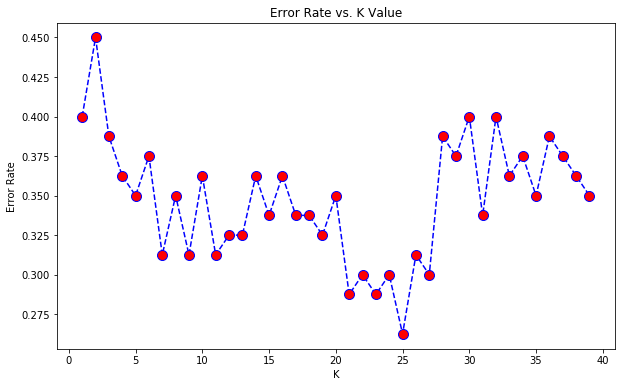

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [19]:
KNN = KNeighborsClassifier(n_neighbors=25)

In [20]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

In [21]:
predict = KNN.predict(X_test)

In [22]:
print (cr(y_test,predict))
print (cm(y_test,predict))

             precision    recall  f1-score   support

          0       0.69      0.93      0.80        44
          1       0.86      0.50      0.63        36

avg / total       0.77      0.74      0.72        80

[[41  3]
 [18 18]]
